In [1]:
import pandas as pd
import pickle
import os

You need to download 4 csv files: admissionDx, diagnosis, patient and treatment.

We removed some outputs since this code is publicly accesible.

In [2]:
admission = pd.read_csv("eicu_samples/admissionDx.csv")
diagnosis = pd.read_csv("eicu_samples/diagnosis.csv")
patient = pd.read_csv("eicu_samples/patient.csv")
treatment = pd.read_csv("eicu_samples/treatment.csv")

### AdmissionDx Data Exploration
> contains the primary diagnosis for admission to the ICU per the APACHE scoring criteria

In [ ]:
admission.head(5)
# admissiondxid : PK, id
# patientunitstayid : FK, connected to Patient
# admitdxenteredoffset : number of minutes from unit admit time that the admission diagnosis was entered
# admitdxpath: admission diagnosis' item’s full path e.g.: admission diagnosis
# admitdxname: admission diagnosis' item’s full name e.g.: Angina, stable (asymp or stable pattern of symptoms w/meds)
# admitdxtext: admission diagnosis amplifying value e.g.: 42, 50

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format
admission.describe()

admitdxpath will be parsed and be training data of GCT.

In [5]:
print(admission.iloc[0]['admitdxpath'])
print(admission.iloc[1]['admitdxpath']) # admitdxpath value has a question as well

admission diagnosis|Operative Organ Systems|Organ System|Cardiovascular
admission diagnosis|Was the patient admitted from the O.R. or went to the O.R. within 4 hours of admission?|Yes


### Diagnosis Data Exploration
> Patient diagnosis recorded in the active diagnosis table. Sequence does indicate relative severity. diagnosisPriority is not required.

In [ ]:
diagnosis.head()
# patientunitstayid: FK
# diagnosisid: PK
# activeupondischarge: denotes whether the diagnosis was active upon discharge from the unit: True or False
# diagnosisoffset: number of minutes from unit admit time that the diagnosis was entered
# diagnosisstring: the full pathstring of the diagnosis selected in eCareManager, the sections of the diagnosis will be separated by |
# icd9code: ICD-9 code for the diagnosis e.g.: 518.81, 537.9, 491.20, etc.
# diagnosispriority: picklist value which denotes whether the diagnosis was marked as: Primary, Major, or Other

In [ ]:
diagnosis.describe()

diagnosisstring will be parsed and be training data of GCT.

In [10]:
print(diagnosis['diagnosisstring'].iloc[0])
print(diagnosis['diagnosisstring'].iloc[10])

cardiovascular|chest pain / ASHD|coronary artery disease|known
renal|disorder of kidney|chronic kidney disease


### Patient Data Exploration
> Contains patient demographics and admission and discharge details for hospital and ICU stays.
>
> type: admission, unit, discharge

In [ ]:
patient.head()
# patientunitstayid # ICU Stay
# patienthealthsystemstayid: patient health system stay (hospital stay)
# gender: Male, Female, Unknown, Other, NULL
# age: age of the patient in full years. If the patient is over 89 years old specify “> 89” e.g.: 79, 36, 52, “> 89”, etc.
# ethnicity: Asian, Caucasian, African American, Native American, Hispanic, Other/Unknown, NUL
# hospitalid: hospital associated with the patient unit stay
# wardid: associated ward ID
# apacheadmissiondx: Full path string of admission diagnosis for patients unit stay e.g.: Pulmonary valve surgery, etc.
# admissionheight: admission height of the patient in cm e.g.: 160.0000, 182.9000, 175.3000, etc.
# hospitaladmittime24: time in 24 hour format of the hospital admit e.g.: “12:45”, “15:30”, “3:45”	
# hospitalAdmitOffset: number of minutes from unit admit time that the patient was admitted to the hospital
# hospitalAdmitSource: location from where the patient was admitted to the hospital e.g.: Direct Admit, Floor, Chest Pain Center. etc.
# hospitalDischargeYear: year of the hospital discharge date
# hospitaldischargetime24
# hospitaldischargeoffset: number of minutes from unit admit time that the patient was discharged from the hospital
# hospitaldischargelocation: Structured list of location where the patient was discharged to from the hospital e.g.: Home, Nursing Home, Death, etc.
# hospitaldischargestatus: specifies patient’s condition upon leaving the hospital: Alive, Expired, or NULL
# unittype: the picklist unit type of the unit e.g.: MICU, Cardiovascular ICUCU...
# unitadmittime24: time in 24 hour format of when the unit admit event occurred e.g.: “12:45”, “15:30”, “3:45”
# unitadmitsource: picklist location from where the patient was admitted e.g.: Emergency Room, Recovery Room, Direct Admit, etc.
# unitvisitnumber: identifies the visit number of the patient, i.e. if the patient’s hospital stay has multiple unit stays
# unitstaytype: patient’s unit stay type: stepdown/other, readmit for undo, admit, pre-admit, transfer, readmit
# admissionweight: admission weight of the patient in kilograms e.g.: 69.7000, 70.9000, 173.0000, etc.
# dischrageweight: patient weight at time of unit discharge in kilograms e.g.: 69.7000, 70.9000, 173.0000, etc.
# unitdischargetime24: time in 24 hour format of when the unit discharge event occurred e.g.: “12:45”, “15:30”, “3:45”
# unitdischargeoffset: number of minutes from unit admit time that the patient was discharged from the unit
# unitdischargelocation: Structured list of locations where the patient was discharged to from the unit
# unitdischargestatus: specifies patient’s condition upon leaving the unit: Alive, Expired, or NULL
# uniquepid: ID for a unique patient.

##### Patient Data Visualization

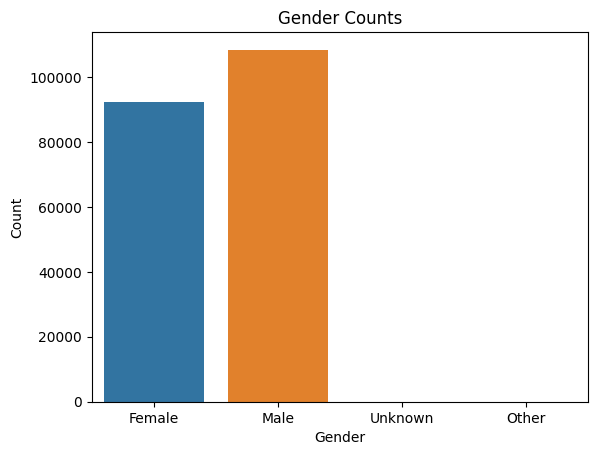

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

gender_counts = patient['gender'].value_counts()
ethnicity_counts = patient['ethnicity'].value_counts()
admission_height_mean = patient['admissionheight'].mean()
admission_height_std = patient['admissionheight'].std()

# Plot gender counts as a bar chart
sns.countplot(x='gender', data=patient)
plt.title("Gender Counts")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

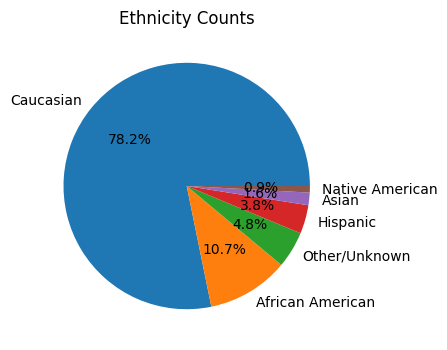

In [16]:
# Plot ethnicity counts as a pie chart
plt.figure(figsize=(6, 4))
plt.pie(ethnicity_counts.values, labels=ethnicity_counts.index, autopct='%1.1f%%')
plt.title("Ethnicity Counts")
plt.show()

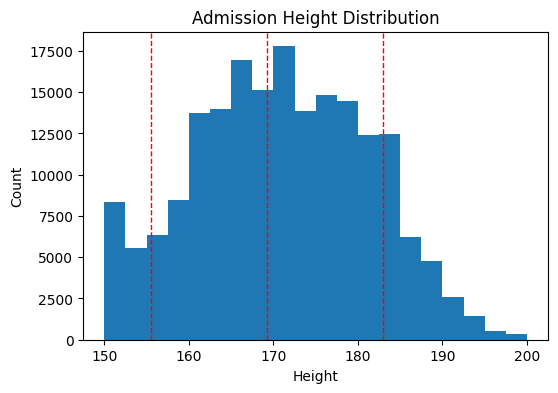

In [17]:
# Plot admission height distribution as a histogram
plt.figure(figsize=(6, 4))
plt.hist(patient['admissionheight'], bins=20, range=(150, 200))
plt.axvline(admission_height_mean, color='red', linestyle='dashed', linewidth=1)
plt.axvline(admission_height_mean + admission_height_std, color='red', linestyle='dashed', linewidth=1)
plt.axvline(admission_height_mean - admission_height_std, color='red', linestyle='dashed', linewidth=1)
plt.title("Admission Height Distribution")
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

### Treatment Data Exploration
> 

In [18]:
treatment.head()

,treatmentid,patientunitstayid,treatmentoffset,treatmentstring,activeupondischarge
0,8399138,242040,198,cardiovascular|hypertension|angiotensin II rec...,False
1,8626134,242040,198,cardiovascular|myocardial ischemia / infarctio...,False
2,8517569,242040,198,infectious diseases|medications|therapeutic an...,False
3,9597686,242040,616,cardiovascular|non-operative procedures|diagno...,False
4,9334096,242040,618,infectious diseases|medications|therapeutic an...,True


### How process_eicu.py processes a patient data?
> The code processes four csv files: admissionDx, diagnosis, patient and treatment. 
>
> The code repeatedly updates the encounter dictionary which contains the customized Encounter class that holds all information about each encounter.

First, the code reads the patient.csv file and gets information about the patient and hospital admission time.

In [19]:
# process patient.csv
patient_dict = {}
for idx in range(patient.shape[0]):
    patient_id = patient.iloc[idx]['patienthealthsystemstayid']
    encounter_id = patient.iloc[idx]['patientunitstayid']
    encounter_timestamp = -int(patient.iloc[idx]['hospitaladmitoffset'])
    
    if patient_id not in patient_dict: # aggregates patient encounter information in dictionary
        patient_dict[patient_id] = []
    patient_dict[patient_id].append((encounter_timestamp, encounter_id))

In [20]:
list(patient_dict.items())[:2] # This is the sample of patient_dict 
# key = patient_id
# value = encounter list
# eg. (patient_id, [(encounter_offset, encounter_id)])

[(128919, [(0, 141168)]), (128927, [(14, 141178), (22, 141179)])]

```patient_dict_sorted```: this dictionary contains the ordered encounter list per patient

```enc_readmission_dict```: this dictionary has readmission encounter IDs

In [21]:
patient_dict_sorted = {}
for patient_id, time_enc_tuples in patient_dict.items():
    patient_dict_sorted[patient_id] = sorted(time_enc_tuples) # per patient, sort the encounter list by encounter offset in ascending order

enc_readmission_dict = {}
for patient_id, time_enc_tuples in patient_dict_sorted.items():
    for time_enc_tuple in time_enc_tuples[:-1]: # iter except the last encounter
        enc_id = time_enc_tuple[1]
        enc_readmission_dict[enc_id] = True # Keep the encounter id in enc_readmission_dict
    last_enc_id = time_enc_tuples[-1][1] # Keep the last encounter id
    enc_readmission_dict[last_enc_id] = False # if the readmission encounter id == first admission id, then set readmission as false

Then Update EncounterInfo data

In [22]:
# Define encounter data structure
class EncounterInfo:
    def __init__(self, patient_id, encounter_id,
                 encounter_timestamp, expired, readmission):
        self.patient_id = patient_id
        self.encounter_id = encounter_id
        self.encounter_timestamp = encounter_timestamp
        self.expired = expired
        self.readmission = readmission
        self.dx_ids = []
        self.rx_ids = []
        self.labs = {}
        # self.physicals = []
        self.treatments = []

In [23]:
count = 0
encounter_dict = {}
for idx in range(patient.shape[0]):
    
    patient_id = patient.iloc[idx]['patienthealthsystemstayid']
    encounter_id = patient.iloc[idx]['patientunitstayid']
    encounter_timestamp = patient.iloc[idx]['hospitaladmitoffset']

    discharge_status = patient.iloc[idx]['unitdischargestatus'] ## discharge info
    duration_minute = float(patient.iloc[idx]['unitdischargeoffset'])
    if discharge_status == 'Expired':
        expired = True 
    else:
        expired = False
    
    readmission = enc_readmission_dict[encounter_id] ## get readmission info
    
    # The training data only includes the encounters shorter than 24 hours and eliminates duplicated medical codes.
    # Moreover, it excludes lab results since they are subject to change over time in the ICU
    if duration_minute > 60. * 24: # if discharged offset is longer than 24 mins
        continue
    ei = EncounterInfo(patient_id, encounter_id, encounter_timestamp, expired, readmission)
    if encounter_id in encounter_dict:
        print('duplicate encounter id! skip')
    else:
        encounter_dict[encounter_id] = ei
        count += 1

Second, the code reads the admissionDx.csv file and gets information about the patient and admission information

In [24]:
missing_eid = 0
for idx in range(admission.shape[0]):
    encounter_id = admission.iloc[idx]['patientunitstayid']
    dx_id = admission.iloc[idx]['admitdxpath'].lower() # updates admissionDxpath
    if encounter_id not in encounter_dict:
        missing_eid += 1
        continue
    encounter_dict[encounter_id].dx_ids.append(dx_id)
    count += 1
print('')
print('Admission Diagnosis without encounter id: {}'.format(missing_eid))


Admission Diagnosis without encounter id: 450589


Third, the code reads the diagnosis.csv file and gets information about diagnosis at each encounter

In [25]:

count = 0
missing_eid = 0
for idx in range(diagnosis.shape[0]):
    encounter_id = diagnosis.iloc[idx]['patientunitstayid']
    dx_id = diagnosis.iloc[idx]['diagnosisstring'].lower() # updates diagnosis
    if encounter_id not in encounter_dict:
        missing_eid += 1
        continue
    encounter_dict[encounter_id].dx_ids.append(dx_id)
    count += 1
print('Diagnosis without encounter id: {}'.format(missing_eid))

Diagnosis without encounter id: 2483092


Finally, the code reads treatment.csv to get information about the treatment.

In [26]:
count = 0
missing_eid = 0
for idx in range(treatment.shape[0]):
    encounter_id = treatment.iloc[idx]['patientunitstayid']
    treatment_id = treatment.iloc[idx]['treatmentstring'].lower()
    if encounter_id not in encounter_dict:
        missing_eid += 1
        continue
    encounter_dict[encounter_id].treatments.append(treatment_id)
    count += 1
print('Treatment without encounter id: {}'.format(missing_eid))
print('accepted treatment: {}'.format(count))

Treatment without encounter id: 3372000
accepted treatment: 316745


Then the script creates EncounterFeatures class and updates information accordingly.

> The original TensorFlow implementation serialized ```dx_ints``` and ```proc_ints``` as variable length sequences. 
>
> These sequences were later converted to SparseTensors upon retrieval and to dense tensors during the lookup process for retrieving the embeddings. 
>
> The shape of the tensors was determined using ```max_num_codes``` and ```vocab_sizes```.
>
> In contrast, here the script stores these variables with the proper shape, eliminating the need for reshaping during the embedding lookup process.

In [27]:
class EncounterFeatures:
    def __init__(self, patient_id, label_expired, label_readmission, dx_ids, dx_ints, proc_ids, proc_ints):
        self.patient_id = patient_id
        self.label_expired = label_expired
        self.label_readmission = label_readmission
        self.dx_ids = dx_ids
        self.dx_ints = dx_ints
        self.proc_ids = proc_ids
        self.proc_ints = proc_ints
        self.prior_indices = None
        self.prior_values = None
        self.dx_mask = None
        self.proc_mask = None

In [28]:
def get_encounter_features(encounter_dict, skip_duplicate=False, min_num_codes=1, max_num_codes=50):
    key_list = [] # patient ID (patientID + encounterID)
    enc_features_list = [] # encounter infos
    dx_str2int = {}
    treat_str2int = {}

    num_cut = 0
    num_duplicate = 0
    count = 0

    num_dx_ids = 0
    num_treatments = 0
    num_unique_dx_ids = 0
    num_unique_treatments = 0

    min_dx_cut = 0
    min_treatment_cut = 0

    max_dx_cut = 0
    max_treatment_cut = 0

    num_expired = 0
    num_readmission = 0

    for _, enc in encounter_dict.items():
        if skip_duplicate:
            if (len(enc.dx_ids) > len(set(enc.dx_ids)) or len(enc.treatments) > len(set(enc.treatments))):
                # If there are duplicated diagnosis IDs and Treatments
                num_duplicate += 1
                continue
        if len(set(enc.dx_ids)) < min_num_codes: # check if diagnosis IDs are less than minium # of codes
            min_dx_cut += 1
            continue
        if len(set(enc.treatments)) < min_num_codes: # check if treatments are less than minium # of codes
            min_treatment_cut += 1
            continue
        if len(set(enc.dx_ids)) > max_num_codes: # check if diagnosis IDs are more than maximum # of codes
            max_dx_cut += 1
            continue
        if len(set(enc.treatments)) > max_num_codes: # check if treatments are more than maximum # of codes
            max_treatment_cut += 1
            continue

        # store the count values
        count += 1
        num_dx_ids += len(enc.dx_ids)
        num_treatments += len(enc.treatments)
        num_unique_dx_ids += len(set(enc.dx_ids))
        num_unique_treatments += len(set(enc.treatments))

        for dx_id in enc.dx_ids:
            if dx_id not in dx_str2int:
                dx_str2int[dx_id] = len(dx_str2int) # encode string diagnosis ID as int value by incrementing the count value
        for treat_id in enc.treatments:
            if treat_id not in treat_str2int:
                treat_str2int[treat_id] = len(treat_str2int) # encode string treatment as int value by incrementing the count value

        patient_id = str(enc.patient_id) + ':' + str(enc.encounter_id) # concatenate patient ID + encounter ID
        if enc.expired:
            label_expired = 1
            num_expired += 1
        else:
            label_expired = 0
        if enc.readmission:
            label_readmission = 1
            num_readmission += 1
        else:
            label_readmission = 0

        # sort the dictionaries
        dx_ids = sorted(list(set(enc.dx_ids)))
        dx_ints = [dx_str2int[item] for item in dx_ids]
        proc_ids = sorted(list(set(enc.treatments)))
        proc_ints = [treat_str2int[item] for item in proc_ids]

        # update values in EncounterFeatures class
        enc_features = EncounterFeatures(patient_id, label_expired, label_readmission, dx_ids, dx_ints, proc_ids,
                                         proc_ints)

        # Store the data
        key_list.append(patient_id)
        enc_features_list.append(enc_features)

    # pad the EncounterFeatures to produce the max_num_codes size
    for ef in enc_features_list:
        dx_padding_idx = len(dx_str2int)
        proc_padding_idx = len(treat_str2int)
        if len(ef.dx_ints) < max_num_codes:
            ef.dx_ints.extend([dx_padding_idx] * (max_num_codes - len(ef.dx_ints)))
        if len(ef.proc_ints) < max_num_codes:
            ef.proc_ints.extend([proc_padding_idx] * (max_num_codes - len(ef.proc_ints)))
        ef.dx_mask = [0 if i == dx_padding_idx else 1 for i in ef.dx_ints]
        ef.proc_mask = [0 if i == proc_padding_idx else 1 for i in ef.proc_ints]

    print('Filtered encounters due to duplicate codes: %d' % num_duplicate)
    print('Filtered encounters due to thresholding: %d' % num_cut)
    print('Average num_dx_ids: %f' % (num_dx_ids / count))
    print('Average num_treatments: %f' % (num_treatments / count))
    print('Average num_unique_dx_ids: %f' % (num_unique_dx_ids / count))
    print('Average num_unique_treatments: %f' % (num_unique_treatments / count))
    print('Min dx cut: %d' % min_dx_cut)
    print('Min treatment cut: %d' % min_treatment_cut)
    print('Max dx cut: %d' % max_dx_cut)
    print('Max treatment cut: %d' % max_treatment_cut)
    print('Number of expired: %d' % num_expired)
    print('Number of readmission: %d' % num_readmission)

    return key_list, enc_features_list, dx_str2int, treat_str2int

This time, we introduce two functions: ```count_conditional_prob_dp()``` and ```add_sparse_prior_guide_dp()```

These functions are the proposed unique techniques that enhance the power of the graph convolutional transformer model which utilizes the self-attention to handle incomplete structure information of EHR data.  

In [29]:
def count_conditional_prob_dp(enc_features_list, output_path, train_key_set=None):
    # Keep the frequency values of admissions, treatments and diagnosis+treatments
    dx_freqs = {}
    proc_freqs = {}
    dp_freqs = {}

    total_visit = 0

    for enc_feature in enc_features_list:
        key = enc_feature.patient_id
        if (train_key_set is not None and key not in train_key_set):
            total_visit += 1
            continue
        dx_ids = enc_feature.dx_ids
        proc_ids = enc_feature.proc_ids
        for dx in dx_ids:
            if dx not in dx_freqs:
                dx_freqs[dx] = 0
            dx_freqs[dx] += 1  # Increment the frequency value o given diagnosis ID
        for proc in proc_ids:
            if proc not in proc_freqs:
                proc_freqs[proc] = 0
            proc_freqs[proc] += 1 # Increment the frequency value of given treatment ID
        for dx in dx_ids:
            for proc in proc_ids:
                dp = dx + ',' + proc # Concat diagnosis ID + treatment ID
                if dp not in dp_freqs:
                    dp_freqs[dp] = 0
                dp_freqs[dp] += 1 # Increment the frequency value of diagnosis ID + treatment ID
        total_visit += 1

    # Calculate the probability based on the frequency values
    dx_probs = dict([(k, v / float(total_visit)) for k, v in dx_freqs.items()])
    proc_probs = dict([ (k, v / float(total_visit)) for k, v in proc_freqs.items() ])
    dp_probs = dict([(k, v / float(total_visit)) for k, v in dp_freqs.items() ])

    # Calculate the conditional probabilities
    dp_cond_probs = {} # p(d|m) d - diagnosis, m - treatment
    pd_cond_probs = {} # p(m|d)
    for dx, dx_prob in dx_probs.items():
        for proc, proc_prob in proc_probs.items():
            dp = dx + ',' + proc # Concat diagnosis ID + treatment ID
            pd = proc + ',' + dx # Concat treatment ID + diagnosis ID
            if dp in dp_probs:
                dp_cond_probs[dp] = dp_probs[dp] / dx_prob # p(m|d) conditioned on diagnosis
                pd_cond_probs[pd] = dp_probs[dp] / proc_prob # p(d|m) conditioned on treatment
            else:
                dp_cond_probs[dp] = 0.0
                pd_cond_probs[pd] = 0.0
    
    # return only conditional probabilities: dp_cond_probs, pd_cond_probs (Originally all probabilities were exported)
    pickle.dump(dp_cond_probs, open(os.path.join(output_path, 'dp_cond_probs.empirical.p'), 'wb'))
    pickle.dump(pd_cond_probs, open(os.path.join(output_path, 'pd_cond_probs.empirical.p'), 'wb'))

In [30]:
def add_sparse_prior_guide_dp(enc_features_list, stats_path, key_set=None, max_num_codes=50):
    # Load the conditional probabilities
    dp_cond_probs = pickle.load(open(os.path.join(stats_path, 'dp_cond_probs.empirical.p'), 'rb'))
    pd_cond_probs = pickle.load(open(os.path.join(stats_path, 'pd_cond_probs.empirical.p'), 'rb'))

    total_visit = 0
    new_enc_features_list = []
    for enc_features in enc_features_list: # Read EncounterFeature instances
        key = enc_features.patient_id # Count the total number of patient + encounter
        if (key_set is not None and key not in key_set):
            total_visit += 1
            continue

        dx_ids = enc_features.dx_ids
        proc_ids = enc_features.proc_ids
        indices = []
        values = []

        for i, dx in enumerate(dx_ids): # Iterate over diagnosis -> treatment
            for j, proc in enumerate(proc_ids):
                dp = dx + ',' + proc # Concat diagnosis + treatment ID
                indices.append((i, max_num_codes + j))
                prob = 0.0 if dp not in dp_cond_probs else dp_cond_probs[dp]
                values.append(prob) # p(m|d) conditioned on diagnosis

        for i, proc in enumerate(proc_ids): # Iterate over treatment -> diagnosis
            for j, dx in enumerate(dx_ids):
                pd = proc + ',' + dx # Concat treatment + diagnosis ID
                indices.append((max_num_codes + i, j))
                prob = 0.0 if pd not in pd_cond_probs else pd_cond_probs[pd]
                values.append(prob) # p(d|m) conditioned on treatment

        enc_features.prior_indices = indices
        enc_features.prior_values = values
        new_enc_features_list.append(enc_features)

        total_visit += 1
    return new_enc_features_list


In [31]:
# Auxiliary function
def get_prior_guide(enc_features):
    import torch
    prior_guide_list = []
    for feats in enc_features:
        indices = torch.tensor(list(zip(*feats.prior_indices))).reshape(2, -1)
        values = torch.tensor(feats.prior_values)
        prior_guide_list.append((indices, values))
    return prior_guide_list

Now, we define the ```convert_features_to_tensors()```

In [32]:
from torch.utils.data import TensorDataset
import torch

def convert_features_to_tensors(enc_features):
    # all_patient_ids = torch.tensor([f.patient_id for f in enc_features], dtype=torch.long)
    all_readmission_labels = torch.tensor([f.label_readmission for f in enc_features], dtype=torch.long)
    all_expired_labels = torch.tensor([f.label_expired for f in enc_features], dtype=torch.long)
    all_dx_ints = torch.tensor([f.dx_ints for f in enc_features], dtype=torch.long)
    all_proc_ints = torch.tensor([f.proc_ints for f in enc_features], dtype=torch.long)
    # all_prior_indices = torch.tensor([f.prior_indices for f in enc_features], dtype=torch.long)
    # all_prior_values = torch.tensor([f.prior_values for f in enc_features], dtype=torch.float)
    all_dx_masks = torch.tensor([f.dx_mask for f in enc_features], dtype=torch.float)
    all_proc_masks = torch.tensor([f.proc_mask for f in enc_features], dtype=torch.float)
    dataset = TensorDataset(all_dx_ints, all_proc_ints, all_dx_masks, all_proc_masks, all_readmission_labels, all_expired_labels)

    return dataset

Finally, we divide the whole dataset into train, valid and test datset

In [33]:
def select_train_valid_test(key_list, random_seed=1234):
    import sklearn.model_selection as ms
    key_train, key_temp = ms.train_test_split(key_list, test_size=0.2, random_state=random_seed)
    key_valid, key_test = ms.train_test_split(key_temp, test_size=0.5, random_state=random_seed)
    return key_train, key_valid, key_test

This is the main function in ```preprocess.py```.

Unlike TensorFlow implementation, which generates 5 folds, this script generates 1 fold. 

There was a slight difficulty in the original code because we had to manually run 2 separate training scripts to run folds.

In [34]:
# A sample of an Encounter data:
sample_encounter = encounter_dict[141178]
print(sample_encounter.patient_id)
print(sample_encounter.encounter_id)
print(sample_encounter.encounter_timestamp)
print(sample_encounter.expired)
print(sample_encounter.readmission)
print(sample_encounter.dx_ids)
print(sample_encounter.rx_ids)
print(sample_encounter.labs)
print(sample_encounter.treatments)

128927
141178
-14
False
True
[]
[]
{}
[]


In [36]:
fold = 0
data_dir = "data"
fold_path = os.path.join(data_dir, 'fold_{}'.format(fold))
if not os.path.exists(fold_path):
    os.makedirs(fold_path)
stats_path = os.path.join(fold_path, 'train_stats')
if not os.path.exists(stats_path):
    os.makedirs(stats_path)
cached_path = os.path.join(fold_path, 'cached')

key_list, enc_features_list, dx_map, proc_map = get_encounter_features(encounter_dict, skip_duplicate=False,
                                                                               min_num_codes=1, max_num_codes=50)
pickle.dump(dx_map, open(os.path.join(fold_path, 'dx_map.p'), 'wb'))
pickle.dump(proc_map, open(os.path.join(fold_path, 'proc_map.p'), 'wb'))

key_train, key_valid, key_test = select_train_valid_test(key_list, random_seed=fold)
count_conditional_prob_dp(enc_features_list, stats_path, set(key_train))
train_enc_features = add_sparse_prior_guide_dp(enc_features_list, stats_path, set(key_train), max_num_codes=50)
validation_enc_features = add_sparse_prior_guide_dp(enc_features_list, stats_path, set(key_valid),
                                                    max_num_codes=50)
test_enc_features = add_sparse_prior_guide_dp(enc_features_list, stats_path, set(key_test), max_num_codes=50)

train_dataset = convert_features_to_tensors(train_enc_features)
validation_dataset = convert_features_to_tensors(validation_enc_features)
test_dataset = convert_features_to_tensors(test_enc_features)

torch.save(train_dataset, os.path.join(cached_path, 'train_dataset.pt'))
torch.save(validation_dataset, os.path.join(cached_path, 'valid_dataset.pt'))
torch.save(test_dataset, os.path.join(cached_path, 'test_dataset.pt'))

## get prior_indices and prior_values for each split and save as list of tensors
train_prior_guide = get_prior_guide(train_enc_features)
validation_prior_guide = get_prior_guide(validation_enc_features)
test_prior_guide = get_prior_guide(test_enc_features)

Filtered encounters due to duplicate codes: 0
Filtered encounters due to thresholding: 0
Average num_dx_ids: 8.253912
Average num_treatments: 7.697826
Average num_unique_dx_ids: 6.462268
Average num_unique_treatments: 5.026276
Min dx cut: 16670
Min treatment cut: 10373
Max dx cut: 1
Max treatment cut: 6
Number of expired: 2983
Number of readmission: 7051


In [ ]:
# save the prior_indices and prior_values
torch.save(train_prior_guide, os.path.join(cached_path, 'train_priors.pt'))
torch.save(validation_prior_guide, os.path.join(cached_path, 'valid_priors.pt'))
torch.save(test_prior_guide, os.path.join(cached_path, 'test_priors.pt'))